# Research Skills: Spatiotemporal Data Analysis
## Worksheet 1 

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University

> A picture is worth a thousand rows of data

Visualization plays an important role in spatiotemporal data analysis. For example, plots of the raw sample data can provide valuable diagnostics to identify temporal structures like trends, cycles, and seasonality.

In this worksheet, we will explore
1. Handling of dates and times
2. Introduction to visualization of time series
3. Loading and displaying lattice data
4. Visualization of spatial and spatiotemporal grid (raster) data
5. Visualization your biorthym

### 0. Setup
Please specify in the next cell if you are working from Google Colab or from your own computer. Also indicate if you already have the GeoPandas library installed.

In [25]:
COLAB = False
GEO_PANDAS_INSTALLED = True

Now run the following to set up the notebook.

In [26]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    # Load the contents of the directory
    !ls
    # Change your working directory to the folder where you stored your files, e.g.
    %cd /content/drive/My Drive/Colab Notebooks/STDA

    if not GEO_PANDAS_INSTALLED:
        !pip install -q condacolab
        import condacolab
        condacolab.install()
        !conda install geopandas
elif not GEO_PANDAS_INSTALLED:
    !pip install geopandas

import datetime as datetime
from os.path import join

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

### 1. Handling of dates and times with Python
#### 1.1  Working with datetime objects
Python has a module named datetime to work with dates and times. The following code create a datatime object of the current time and a date object of today's date. 

In [27]:
datetime_object = datetime.datetime.now()
print(datetime_object)

date_object = datetime.date.today()
print(date_object)

2024-04-15 08:11:44.434352
2024-04-15


These functions calculate the number of second which have elapsed from the UNIX/POSIX time January 1, 1970 (midnight UTC/GMT) 
There are two ways to convert today's date to seconds, try: 

In [28]:
print(datetime_object.timestamp())

print((datetime_object - datetime.datetime(1970,1,1)).total_seconds())

1713161504.434352
1713168704.434352


#### 1.2 Datetime index
Many time series datasets that you will work with store the index of dates as strings. These strings should be converted to a datetime index before ploting.

Convert `date_object` and `datetime_object` to datetime using `pd.to_datetime()`

In [29]:

date_object = pd.to_datetime(date_object)

datetime_object = pd.to_datetime(datetime_object)

#### 1.3 Merging Time Series With Different Dates
Pandas can be used to merge two time-series. The code below creates two dataframes.

Use pandas to combine the two dataframes `df1` and `df2` and display the results.

In [30]:
df1 = pd.DataFrame({'date': [ datetime.date(2019,10,4), datetime.date(2019,12,9), datetime.date(2020,1,9), datetime.date(2020,1,28)],'price': [1800,1500, 1600,1900]})
df2 = pd.DataFrame({'date': [ datetime.date(2019,11,3), datetime.date(2019,12,1), datetime.date(2020,1,7), datetime.date(2020,1,16),datetime.date(2020,2,3)],'price': [1800,1500, 1600,1900, 2000]}) 

# Setting the date as the index
df1.set_index('date', inplace=True)
df2.set_index('date', inplace=True)

df = [df1, df2]
df = pd.concat(df)
display(df)

,price
date,
2019-10-04,1800
2019-12-09,1500
2020-01-09,1600
2020-01-28,1900
2019-11-03,1800
2019-12-01,1500
2020-01-07,1600
2020-01-16,1900
2020-02-03,2000


### 2. Introduction to visualization of time series
Examples of visualizations 
* Line Plot 
* Histograms and Density Plots
* Box and Whisker Plots
* Heat Maps

The following code loads the Minimum Daily Temperatures dataset, which describes the minimum daily temperatures over 10 years (1981-1990) in Melbourne, Australia.

Then, it creates a line plot with the temperature data and figure with separate line plots for each year.

In [61]:
temperatures = pd.read_csv(join('data', 'daily-minimum-temperatures.csv'), header=0, index_col=0, parse_dates=True)
temperatures_by_year = temperatures.pivot_table(index=[temperatures.index.month, temperatures.index.day], columns=temperatures.index.year, values='Temp')
display(temperatures)

temperatures.plot()

temperatures_by_year.plot(figsize=(10, 5), subplots=True, legend=False, sharey=True)
plt.tight_layout()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3858143692.py, line 3)

Some linear time series forecasting methods assume a well-behaved distribution of observations such as a normal distribution.  
This distribution can be visualized in a histogram plot.

Create a histogram plot of all the observations in the Minimum Daily Temperatures dataset. Then, create a figure with separate histogram plots for the observations in each year.

array([[<Axes: title={'center': '1981'}>,
        <Axes: title={'center': '1982'}>,
        <Axes: title={'center': '1983'}>],
       [<Axes: title={'center': '1984'}>,
        <Axes: title={'center': '1985'}>,
        <Axes: title={'center': '1986'}>],
       [<Axes: title={'center': '1987'}>,
        <Axes: title={'center': '1988'}>,
        <Axes: title={'center': '1989'}>],
       [<Axes: title={'center': '1990'}>, <Axes: >, <Axes: >]],
      dtype=object)

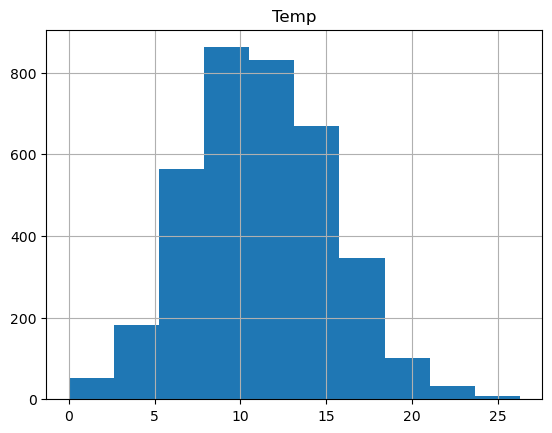

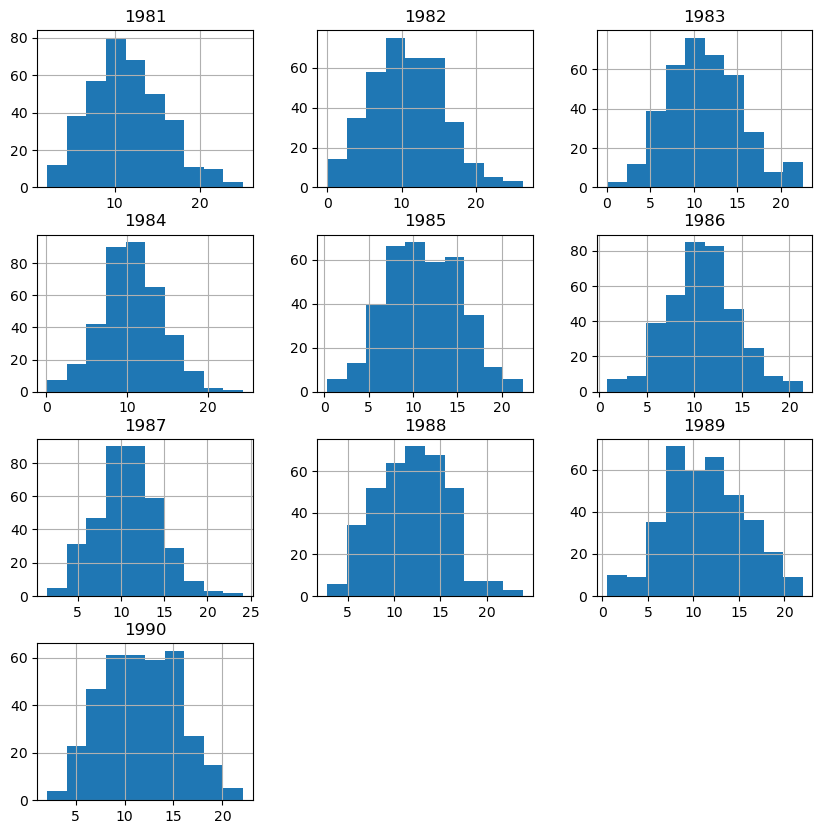

In [32]:
temperatures.hist()
temperatures_by_year.hist(figsize = [10, 10])

Boxplots can also summarize the distribution of observations. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Outliers outside the whiskers or extents of the data are represented by dots.

Create boxplots for the temperature distribution for each year.

<Axes: >

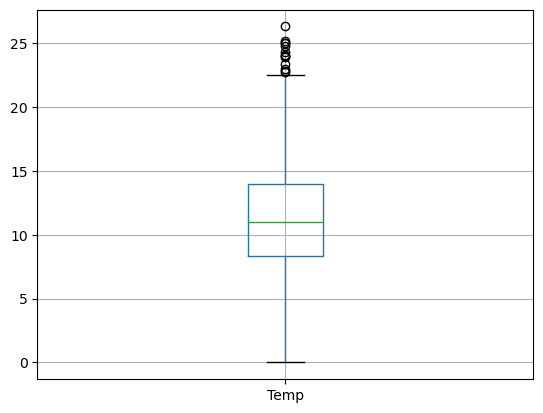

In [78]:
temperatures.boxplot()

<Axes: >

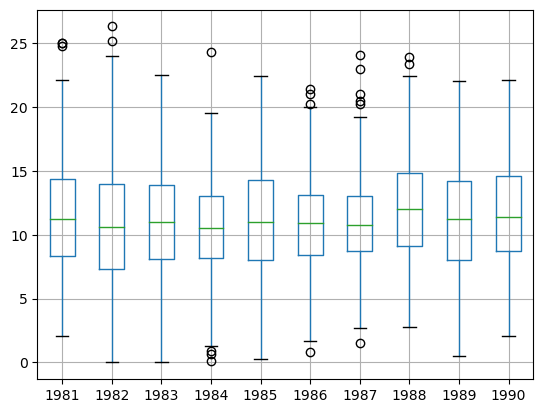

In [77]:
temperatures_by_year.boxplot()

Create boxplots for each month in the year 1985. First, extract the observations from the year 1985. Then, group the observations by month and create the boxplots.

1          Axes(0.1,0.736957;0.235294x0.163043)
2     Axes(0.382353,0.736957;0.235294x0.163043)
3     Axes(0.664706,0.736957;0.235294x0.163043)
4          Axes(0.1,0.541304;0.235294x0.163043)
5     Axes(0.382353,0.541304;0.235294x0.163043)
6     Axes(0.664706,0.541304;0.235294x0.163043)
7          Axes(0.1,0.345652;0.235294x0.163043)
8     Axes(0.382353,0.345652;0.235294x0.163043)
9     Axes(0.664706,0.345652;0.235294x0.163043)
10             Axes(0.1,0.15;0.235294x0.163043)
11        Axes(0.382353,0.15;0.235294x0.163043)
12        Axes(0.664706,0.15;0.235294x0.163043)
dtype: object

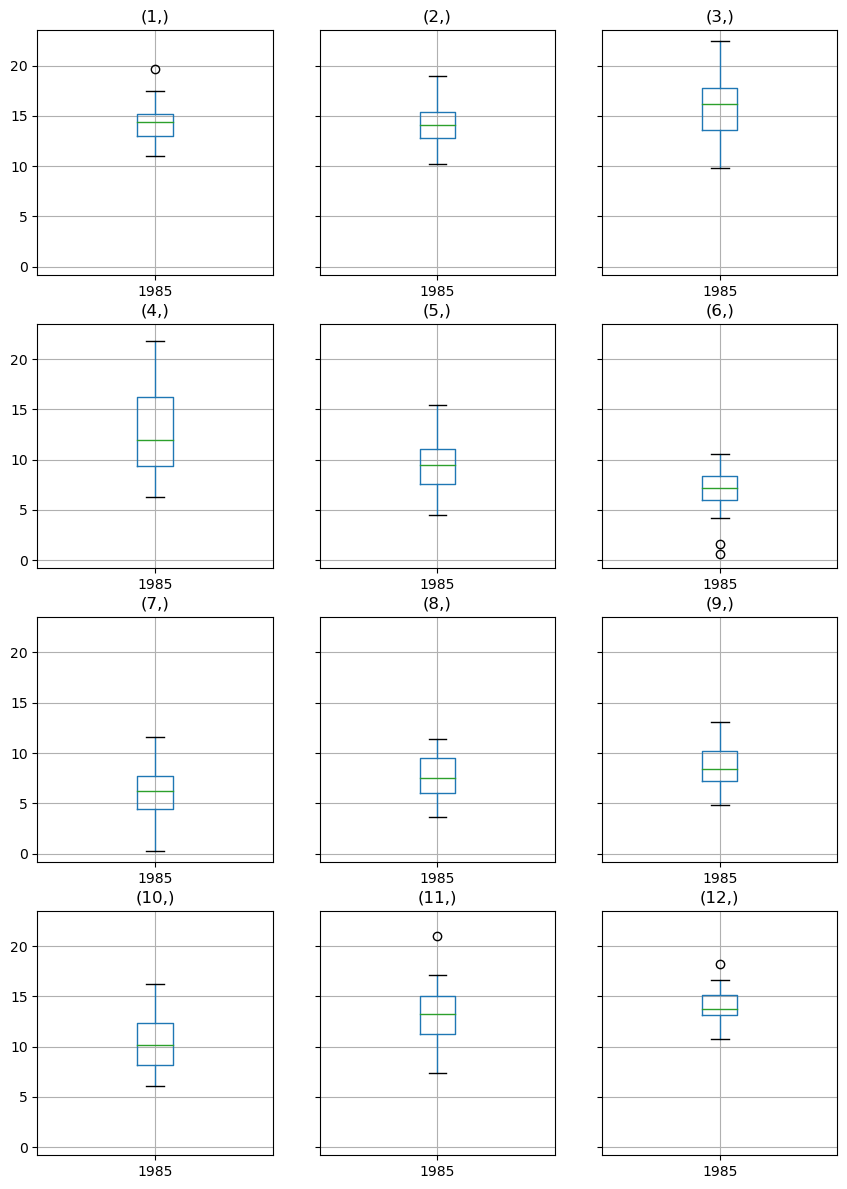

In [95]:
temperatures_1985 = temperatures_by_year[1985]
temperatures_1985 = pd.DataFrame(temperatures_1985)
temperatures_1985 = temperatures_1985.groupby(["Date"])
temperatures_1985.boxplot(figsize = [10, 15])

We can also create heatmaps of the temperature. A heatmap is a matrix of numbers which as plotted as a surface (or raster). The value of each cell in the matrix is assigned a unique color. The following code creates a heatmap of the temperature where each column represents one day and a heatmap where each row represents one year and each column represents one day. Create a heatmap where each row represents one year and each column represents one month.

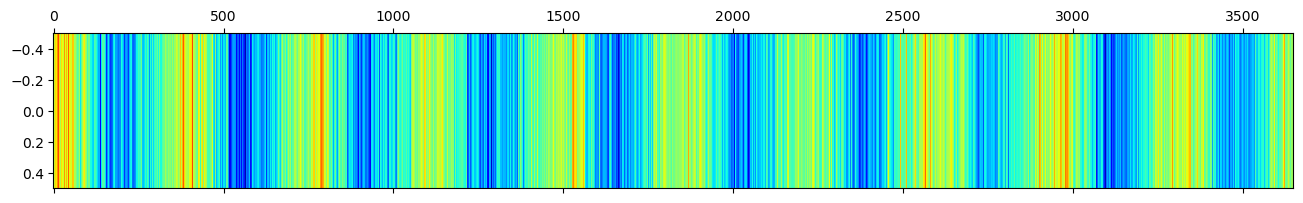

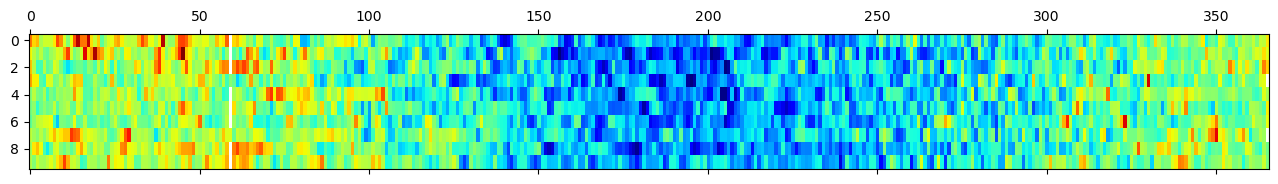

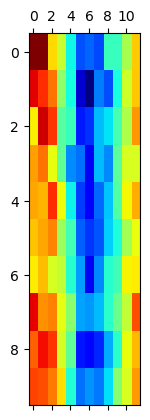

In [97]:
plt.matshow(temperatures.T, interpolation=None, aspect='auto', cmap='jet')
plt.matshow(temperatures.pivot_table(index=temperatures.index.year, columns=[temperatures.index.month, temperatures.index.day], values='Temp'), cmap='jet', aspect=4)

#
# Your code goes here
#
plt.matshow(temperatures.pivot_table(index=temperatures.index.year, columns=[temperatures.index.month], values='Temp'), cmap='jet', aspect=4)

### 3. Loading and displaying lattice data (maps)

A shapefile is a simple, nontopological format for storing the geometric location and attribute information of geographic features such as municipalities in the Netherlands. GeoPandas is a package that extends the datatypes used by pandas to allow spatial operations on geometric types such as loading shapefiles and displaying them. The following code loads and displays a shapefile of the municipalities in the Netherlands (downloaded from cbs.nl).

,GM_CODE,WATER,SHAPE_Leng,SHAPE_Area,JRSTATCODE,GM_NAAM,geometry
0,GM0003,NEE,26201.130337,2.457996e+07,2020GM0003,Appingedam,"POLYGON ((249539.950 593217.579, 249543.450 59..."
1,GM0010,NEE,143224.062477,1.362080e+08,2020GM0010,Delfzijl,"MULTIPOLYGON (((267829.905 587996.480, 267824...."
2,GM0014,NEE,98454.011502,1.979605e+08,2020GM0014,Groningen,"POLYGON ((227979.943 584879.819, 227981.153 58..."
3,GM0024,NEE,64612.053242,1.119892e+08,2020GM0024,Loppersum,"POLYGON ((244952.159 601043.418, 244954.500 60..."
4,GM0034,NEE,77001.560697,1.392038e+08,2020GM0034,Almere,"MULTIPOLYGON (((142993.687 482642.725, 142993...."


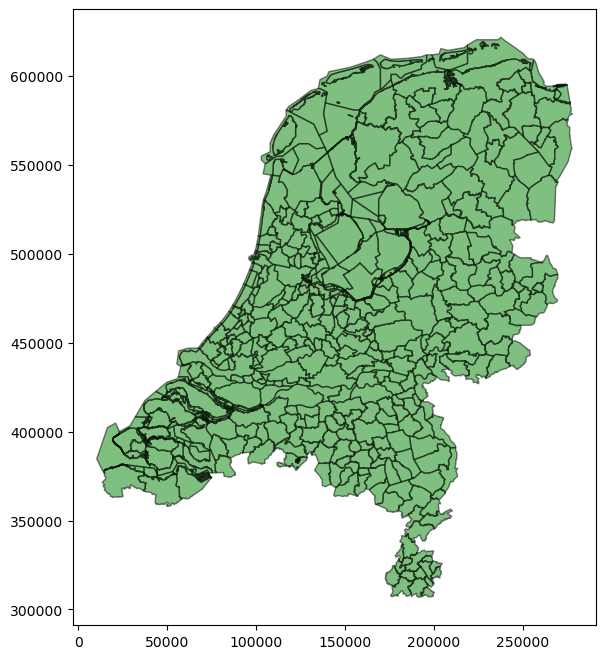

In [98]:
gdf = gpd.read_file(join('data', 'bu_wk_gm2020_shapes', 'Gemeenten2020.shp'))
gdf.plot(figsize=(8, 8), alpha=0.5, facecolor = 'g', edgecolor='k')
gdf.head()

One of the columns in the geopandas dataset is 'WATER'. Remove all the rows where the variable 'WATER' is set to 'JA'. In other words, create a new variable which contains only the rows where 'WATER' is set to 'NEE'. Display the new geopandas plot (without the polygons which represent water).

In [107]:
gdf0 = gdf.groupby("WATER")
display(gdf0)

## Advanced Level:
### 4. Spatial and Spatiotemporal Visualization of Raster Data.

We will use the Tropical Pacific Sea Surface Temperature (SST) Anomalies dataset for spatiotemporal visualization. These data represent gridded monthly SST anomalies for 60 consecutive months. The data were obtained from the IRI/LDEO Climate Data Library at Columbia University (http://iridl.ldeo.columbia.edu/). The data are gridded at a 2 degree by 2 degree resolution and represent anomalies from a March 1997 - March 2002 monthly (average) climatology.

The dataset consists of 
* SST031997_032003.dat 2520 x 60 matrix; 2520 spatial locations corresponding to an 84 (longitude) by 30 (latitude) grid with 2 deg x 2 deg spacing. The longitudes correspond to 124 E to 70 W and the latitudes to 29 S to 29 N. There are 60 time periods representing sequentially the months from March 1997 through March 2002.
* SSTlandmask.dat 2520 x 1 vector; land/sea mask corresponding to the grid locations in SSTlonlat.dat, with a value of 1 corresponding to a "land" location and a 0 corresponding to a water location.


#### 4.1  Spatial plots of Raster Data
Spatial plots gridded data are often presented as contour plots, so-called “image” plots, or surface plots. The following code loads the land/sea mask and creates a contour plot. 

In [ ]:
land_sea = pd.read_csv(join('data', 'SSTlandmask.dat'), header=None)

# Reshape the land sea mask to a grid
Z = np.reshape(land_sea.values, (30, 84)) 

# Create a 2-D grid for X and Y with the same shape as Z
lat_range = range(-29, 31, 2)
long_range = range(124, 292, 2)
X, Y = np.meshgrid(long_range, lat_range)

plt.contourf(X, Y, Z, cmap='gray')
plt.colorbar()
plt.axis('off')

The following code loads the dataset of the sea surface temperature as a numpy array `sst`.
1. Reshape the numpy array `sst` to a 30 by 84 by 60 numpy array.
2. Visualize the sea surface temperature for the last time point for each grid location. Hint: replace the land mask from the previous plot with the last sea temperatures.


In [ ]:
sst = np.loadtxt(join('data', 'SST031997_032003.dat'), delimiter=' ')

#
# Your code goes here
#

#### 4.2  Spatiotemporal plots of Raster Data
The axes of a Hovmöller diagram are typically longitude or latitude (x-axis) and time (y-axis) with the value of some field represented through color or shading. The following code creates a Hovmöller plot for time vs. longitude averaged for latitude 1 S to 1 N, which correspond to rows 14 and 15.

Create a Hovmöller plot for time vs. latitude averaged for longitudes 178 E to 178 W. Hint: the range of longitudes in `sst` is 124 E to 70 W in steps of 2. Longitudes 180 E and 180 W are equal.

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('SST anomalies for time vs longitude')
plt.xlabel('longitude')
plt.ylabel('time')
plt.yticks([0, 10, 22, 34, 46, 58], [f'{year}' for year in range(1997, 2003)])

sst_long = np.mean(sst[14:16, :, :], axis=0)
time_range = range(60)
X, Y = np.meshgrid(long_range, time_range)
plt.contourf(X, Y, sst_long.T, cmap='jet')
plt.colorbar()

plt.figure(figsize=(8, 8))
plt.title('SST anomalies for time vs latitude')
plt.xlabel('latitude')
plt.ylabel('time')
plt.yticks([0, 10, 22, 34, 46, 58], [f'{year}' for year in range(1997, 2003)])

#
# Your code goes here
#

### 5. Graphing your biorythms over time
Biorhythms are based on the notion that three sinusoidal cycles influence our lives. The physical cycle has a period of 23 days, the emotional cycle has a period of 28 days, and the intellectual cycles has a period of 33 days. For an individual, the cycles are initialized at birth. The figure below shows a biorhythm, which begins on June 28, 1975, plotted for an eight-week period centered around the date this is written.
![title](data/Biorhythms.png)

1. Create two datetime objects, `t0` for your birthdate and `t1` for today.
2. Create an array of dates `dates` starting from 28 days before today until 28 days after at an interval of 1 day.  Hint: you can use `datetime.timedelta()` and a list comprehension.
3. Convert the datetime object `t0` to seconds with the date2num() function and named the converted variable as t0t.



In [ ]:
#
#  Your code goes here 
#

The code below are your three sinusoidal cycles. 

In [ ]:
ordinal_dates = np.array([date.toordinal() - t0.toordinal() for date in dates])

y1 = np.sin(2 * np.pi * ordinal_dates / 23)
y2 = np.sin(2 * np.pi * ordinal_dates / 28)
y3 = np.sin(2 * np.pi * ordinal_dates / 33)

plt.plot(np.array([y1, y2, y3]).T)
plt.xticks(range(0, 63, 7), range(-28, 35, 7))
plt.show()